In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# pandas: Used to load and manipulate data in tabular form (like CSV files).
# train_test_split: A utility function from scikit-learn used to split the dataset into training and test sets.
# LabelEncoder: A utility to convert categorical labels (like strings) into numerical values.
# RandomForestClassifier: The machine learning model used to perform classification.
# accuracy_score, classification_report, confusion_matrix: Used to evaluate the performance of the classifier.
# seaborn: A data visualization library used to plot a confusion matrix heatmap.

In [21]:
# Load the car evaluation dataset
data = pd.read_csv("car_evaluation.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [23]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [24]:
data.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [25]:
label_encoder = LabelEncoder()
label_encoder #Creates an instance of the LabelEncoder class.

LabelEncoder()

In [26]:
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
    print(column)
# This loop iterates over each column in the dataset.
# fit_transform() applies the encoding process to convert categorical values (like 'vhigh', 'low') into numerical values (like 3, 1).
# It replaces the original categorical values with their corresponding numerical labels.
# The print(column) displays the column name during the transformation.    

vhigh
vhigh.1
2
2.1
small
low
unacc


In [27]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [28]:
X = data.drop(columns='unacc')  # Features
y = data['unacc']  # Target (safety level)
#X: All columns except 'unacc', which are the features (input variables).
# y: The 'unacc' column, which is the target variable (output or label).

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Splits the dataset into training (70%) and testing (30%) sets.
# X_train and y_train: Training features and target.
# X_test and y_test: Test features and target.
# test_size=0.3 means 30% of the data will be used for testing.
# random_state=42 ensures reproducibility by setting a seed for the random split.

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Creates an instance of the RandomForestClassifier model with 100 decision trees (n_estimators=100).
# random_state=42 ensures reproducibility of results.
# Fits the model to the training data (X_train, y_train), i.e., it learns from the training data.

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_classifier.predict(X_test)
#Uses the trained Random Forest model to make predictions on the test set (X_test).

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# accuracy_score calculates the accuracy of the model, which is the proportion of correctly predicted instances in the test set.
# The accuracy is then printed, formatted to 4 decimal places.

Accuracy: 0.9653


In [33]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# classification_report generates a detailed report on the model's performance, including:
# Precision: How many of the predicted positive instances were actually positive.
# Recall: How many of the actual positive instances were correctly predicted.
# F1-score: The harmonic mean of precision and recall.
# Support: The number of occurrences of each class in the test data.

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519



In [34]:
# Display the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# confusion_matrix creates a confusion matrix, which compares the predicted labels (y_pred) with the true labels (y_test). The matrix shows:
# True Positive (correctly predicted positives),
# True Negative (correctly predicted negatives),
# False Positive (incorrectly predicted as positive),
# False Negative (incorrectly predicted as negative).
# It prints the confusion matrix to the console.

Confusion Matrix:
[[108   1   7   2]
 [  1  12   0   4]
 [  1   0 360   0]
 [  2   0   0  21]]


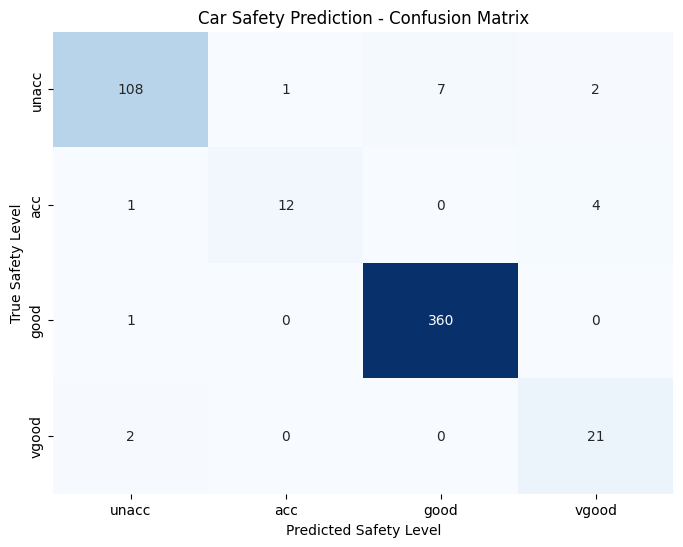

In [35]:
labels = ['unacc', 'acc', 'good', 'vgood']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Car Safety Prediction - Confusion Matrix")
plt.xlabel("Predicted Safety Level")
plt.ylabel("True Safety Level")
plt.show()
# Defines the labels for the classes in the confusion matrix. These are the categories of the 'unacc' column (unacceptable, acceptable, good, and very good).
# sns.heatmap plots a heatmap of the confusion matrix.
# annot=True: Displays the matrix values on the heatmap.
# fmt='d': Formats the values as integers.
# cmap='Blues': Uses a blue color palette for the heatmap.
# xticklabels and yticklabels: Assigns the class labels to the x and y axes.
# plt.show(): Displays the plot.

In [36]:
# What is Random Forest?
# Random Forest is a machine learning algorithm that belongs to the ensemble learning methods. It combines multiple decision trees to create a more robust model that provides better accuracy and reduces the risk of overfitting. Random Forest is typically used for both classification and regression tasks, where the goal is to predict a category or continuous value.

# Decision Trees are simple models that split data based on feature values to make predictions. However, a single decision tree can easily overfit the data.
# Random Forest builds multiple decision trees (called an ensemble) using random subsets of the data and features, and the final prediction is made by aggregating the predictions from all the trees.
# How Does Random Forest Work?
# Random Forest works by using a collection of decision trees, each trained on a random subset of the training data and using random subsets of features for splitting nodes. Here’s a step-by-step breakdown of how it works:

# Bootstrap Aggregating (Bagging):

# A random subset of the original dataset is selected with replacement (i.e., some data points may appear multiple times).
# This process is repeated to create multiple different datasets.
# Decision Tree Creation:

# For each subset of the data, a decision tree is built.
# Random subsets of features are selected to split nodes in the tree, helping to create diverse trees and prevent overfitting.
# Voting:

# For classification: Each tree gives a "vote" for a class. The class that gets the majority of votes across all trees becomes the final prediction.
# For regression: The prediction is the average of all the individual tree predictions.
# Prediction:

# Once the forest of decision trees is trained, it is used to predict the class (for classification) or value (for regression) for new, unseen data.
# Real-Time Applications of Random Forest
# Healthcare:

# Predicting Disease Diagnosis: Random Forest can classify whether a patient is likely to have a disease based on various medical features like age, symptoms, and test results.
# Example: Predicting whether a patient has diabetes based on factors like blood sugar levels, age, weight, and family history.
# Finance:

# Credit Scoring and Risk Assessment: Financial institutions use Random Forest to predict whether an applicant is a credit risk based on historical data such as income, spending patterns, and credit history.
# Example: Predicting the likelihood of loan default or classifying users as high or low risk for credit cards or loans.
# Retail and E-commerce:

# Customer Segmentation and Churn Prediction: Random Forest can be used to classify customers into different segments or predict whether a customer will leave a service (churn).
# Example: Predicting whether a customer will cancel their subscription based on their usage and engagement with the service.
# Marketing:

# Targeted Marketing Campaigns: By analyzing customer data, Random Forest can predict the likelihood of a customer purchasing a product, helping marketers to target specific groups with tailored offers.
# Example: Predicting which customers will respond to a new marketing campaign or a discount offer based on past purchase behavior.
# Autonomous Vehicles:

# Object Detection and Classification: Random Forest is used in self-driving cars to classify objects around the vehicle (e.g., pedestrians, other vehicles, road signs) based on sensor data.
# Example: Detecting whether an object on the road is a pedestrian, a car, or a stop sign based on inputs from cameras and LIDAR sensors.
# Environmental Science:

# Predicting Climate and Weather Conditions: Random Forest models can be used to predict weather conditions or climate change trends based on environmental data.
# Example: Predicting rainfall patterns or temperature fluctuations based on historical weather data.
# Image and Speech Recognition:

# Classifying Images or Sounds: Random Forest can be used in image recognition tasks, where each tree classifies different features of an image, and the majority vote decides the overall classification.
# Example: Recognizing whether an image contains a cat or a dog based on pixel data and patterns.
# Summary
# What is Random Forest?
# Random Forest is an ensemble machine learning technique that builds multiple decision trees to improve accuracy and prevent overfitting. It can be used for classification and regression tasks.

# How Does it Work?

# It uses Bootstrap Aggregating (Bagging) to create multiple random subsets of data.
# Decision trees are trained on these subsets.
# The final prediction is made by aggregating the outputs of all trees (via majority vote for classification or averaging for regression).
# Real-Time Applications:

# Healthcare: Disease diagnosis prediction.
# Finance: Credit scoring and fraud detection.
# Retail: Customer churn prediction and sales forecasting.
# Marketing: Targeted campaigns and customer segmentation.
# Autonomous Vehicles: Object detection.
# Environmental Science: Climate and weather predictions.
# Image and Speech Recognition: Object classification and pattern recognition.

In [37]:
# What is Random Forest?
# Random Forest is an ensemble machine learning algorithm used for classification and regression tasks. It works by creating a collection (forest) of decision trees and combines their predictions to make a final decision. It’s known for being accurate and robust, handling large datasets with high-dimensional features.

# How it Works
# Multiple Decision Trees: Random Forest builds multiple decision trees on random subsets of the training data.
# Bootstrapping: It uses bootstrapping (random sampling with replacement) to create diverse datasets for each tree.
# Majority Voting: For classification, the final prediction is made by taking the majority vote from all trees.
# Bagging: It reduces overfitting by averaging the results of multiple trees, which ensures more stable predictions.
# Real-Time Applications
# Healthcare: Predicting disease or patient outcomes based on medical data (e.g., classifying whether a tumor is malignant or benign).
# Finance: Credit scoring, fraud detection, and risk management based on customer data and transaction history.
# Retail: Product recommendation systems that predict what customers are likely to buy.
# Autonomous Vehicles: Classifying objects (e.g., pedestrians, vehicles) from sensor data for self-driving cars.
# Customer Service: Predicting customer churn by analyzing behavior patterns like usage history and complaints.

In [ ]:
?